In [2]:
# This program uses an artificial recurrent neural network called long short term Memory (LSTM)
# To predict the closing stock price of a corpration (Apple.Inc). Using the past 60 day stock price

In [3]:
# Importing Libraries 

import math 
import pandas_datareader as web
import yfinance as yf
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

#Showing the data:
df

C:\Users\parmi\AppData\Local\Temp\ipykernel_33376\2549790172.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359184,12.397354,12.292164,12.304186,302220800
2012-01-04,12.425602,12.462870,12.300577,12.322216,260022000
2012-01-05,12.563551,12.579179,12.402460,12.470984,271269600
2012-01-06,12.694888,12.705407,12.599316,12.615846,318292800
2012-01-09,12.674754,12.855681,12.663333,12.788059,394024400
...,...,...,...,...,...
2019-12-10,64.915077,65.299518,64.281588,64.944091,90420400
2019-12-11,65.468773,65.548567,64.919918,64.994872,78756800


In [5]:
# Get the number of rows and coloums 

df.shape

(2002, 5)

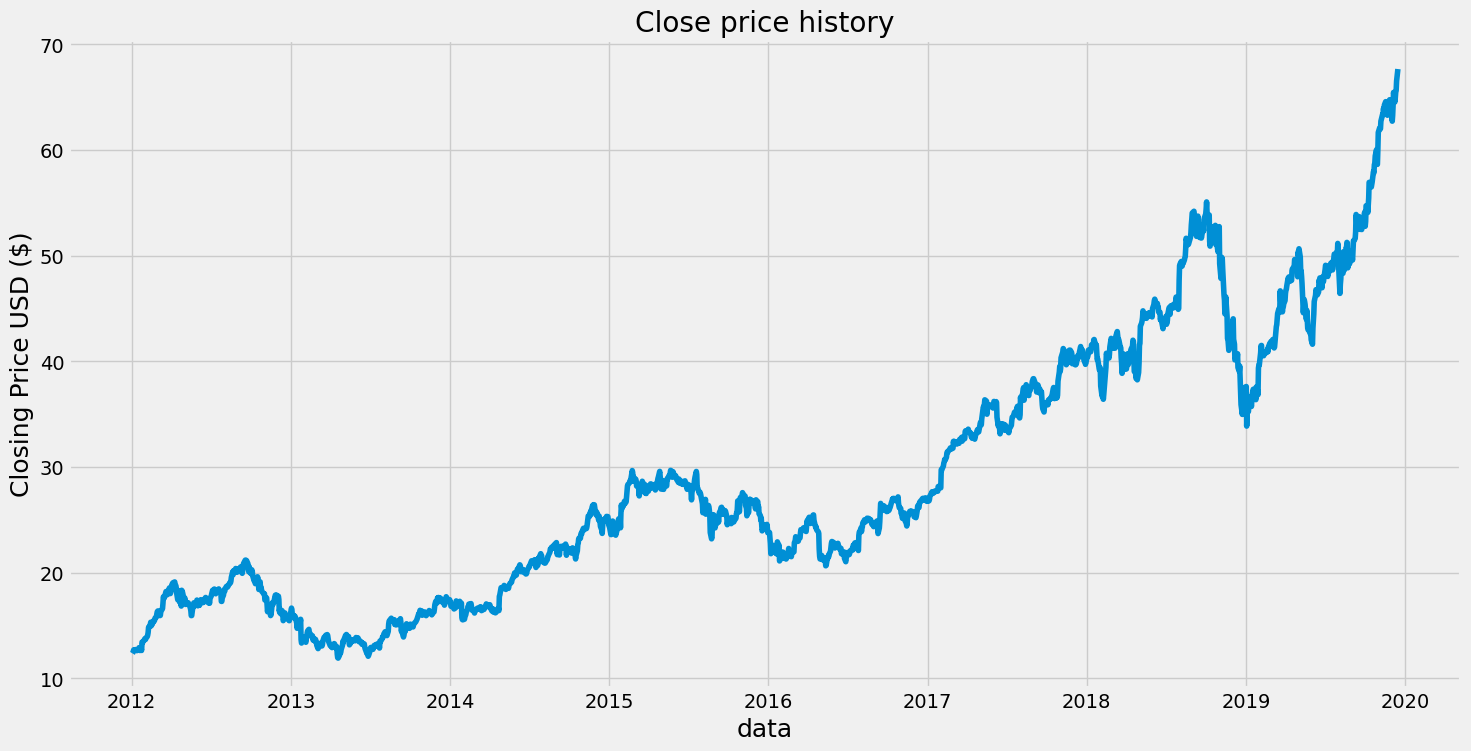

In [6]:
# Visualize the closing price history 

plt.figure(figsize=(16, 8))
plt.title("Close price history")
plt.plot(df['Close'])
plt.xlabel('data', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [7]:
df.columns   # Not just a regular array its a MultiIndex Array

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [28]:
# Create a new data frame with the close coloumn
data = df.filter([('Close' ,'AAPL')])

# Convert the data frame to a numpy array 
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)    # 80 percent of the data is used for traning 

training_data_len


1602

In [9]:
# Scale the data ensures the model doesn’t get thrown off by large differences in magnitude between features like
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00805075],
       [0.00924197],
       [0.01171611],
       ...,
       [0.96357325],
       [0.9795751 ],
       [1.        ]])

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]   # From row 0 to training_data_len

# Split the Data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):   
    x_train.append(train_data[i-60:i, 0])   # From i-60 to i | 60 values
    y_train.append(train_data[i, 0])        # 61st value only

    if i<=60:
        print(x_train)
        print(y_train)
        print()


[array([0.00805075, 0.00924197, 0.01171611, 0.01407166, 0.01371056,
       0.01452445, 0.0141525 , 0.01352725, 0.01267563, 0.01531137,
       0.01768851, 0.01695549, 0.01293968, 0.0167722 , 0.01299897,
       0.02714842, 0.02605424, 0.02748266, 0.03057129, 0.03244175,
       0.03228538, 0.03170864, 0.03416669, 0.03647906, 0.03909877,
       0.04333011, 0.05221851, 0.0523534 , 0.0573017 , 0.06099945,
       0.05464427, 0.05709142, 0.05704296, 0.06390482, 0.06292918,
       0.0647349 , 0.06797991, 0.06978548, 0.07498711, 0.07877648,
       0.07987057, 0.0802535 , 0.07377435, 0.07221112, 0.07244307,
       0.078534  , 0.08024793, 0.08392963, 0.09260793, 0.10418626,
       0.10201935, 0.10202485, 0.11039592, 0.11301565, 0.11115053,
       0.10944731, 0.10767383, 0.11356542, 0.1176081 , 0.11930081])]
[np.float64(0.11511780821683504)]



In [11]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
# Reshape the data since LSTM network expects the input to be 3D 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape


(1542, 60, 1)

In [13]:
# Build the LSTM Model
# Keras model class that allows you to stack layers one after another, in a linear fashion — like a pipeline
model = Sequential()

# Adding to our sequential model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))    # 1 since we are predicting 1 value which is the next days closing price




c:\Users\parmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model 

model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
# Fit == Train                            Is the number of iterations
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 0.0022


In [29]:
# Create the testing data set 
# Create a new array containing scaled values from index 1543 to 2003 
test_data = scaled_data[training_data_len - 60 : , :]

# Create the data sets x_text and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [17]:
# Convert the data to numpy array
x_test = np.array(x_test)
x_test

array([[0.51267271, 0.50937623, 0.5154198 , ..., 0.58649404, 0.58462714,
        0.57737251],
       [0.50937623, 0.5154198 , 0.52809863, ..., 0.58462714, 0.57737251,
        0.58475447],
       [0.5154198 , 0.52809863, 0.54276361, ..., 0.57737251, 0.58475447,
        0.57970588],
       ...,
       [0.74953773, 0.74171202, 0.72774674, ..., 0.94388603, 0.95065072,
        0.96058136],
       [0.74171202, 0.72774674, 0.73202713, ..., 0.95065072, 0.96058136,
        0.96357325],
       [0.72774674, 0.73202713, 0.72753088, ..., 0.96058136, 0.96357325,
        0.9795751 ]])

In [18]:
# Reshape the test data since LSTM network expects the input to be 3D 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # num of rows and num of coloumns and num of features


In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)    # Converts into orginal $$ format


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [20]:
# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)



0.3237190341949463


In [21]:
# Get the last 60 days of closing pricing
last_60_day = data[-60:].values

# Scale the data using the same scaler used for training 
last_60_day = scaler.transform(last_60_day)

In [22]:
# Create the input shape [samples, time steps, features]
x_future = []
x_future.append(last_60_day)   # (60,1)
x_future = np.array(x_future)  # (1,60,1)   1 sample, 60 time steps, 1 feature per time step (closing price)
x_future = np.reshape(x_future, (x_future.shape[0], x_future.shape[1], 1))

In [23]:
# Predict the next days closing price

future_predictions = model.predict(x_future)
future_predictions = scaler.inverse_transform(future_predictions)

# future_prediction[0][0] → gets the first value inside that row → 188.562347
print(f"Predicted next days closing price: ${future_predictions[0][0]:.2f}") 
# The closing price of December 18, 2019



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted next days closing price: $63.90


In [25]:
model.save("stock_lstm_model.h5")